In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [85]:
data= pd.read_excel("cancer.xlsx")
df= pd.DataFrame(data)
df

,index,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,N Stage,6th Stage,differentiate,diagnosis
0,1,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,N1,IIA,Poorly differentiated,M
1,2,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,N2,IIIA,Moderately differentiated,M
2,3,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,N3,IIIC,Moderately differentiated,M
3,4,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,N1,IIA,Poorly differentiated,M
4,5,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,N1,IIB,Poorly differentiated,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,N2,IIIA,Moderately differentiated,M
565,566,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,N2,IIIA,Poorly differentiated,M
566,567,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,N1,IIA,Well differentiated,M
567,568,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,N1,IIA,Well differentiated,M


## Column Types

In [86]:
cat_cols=[]
num_cols=[] 
for cat in df.columns:
    if df[cat].dtype==object:
        cat_cols.append(cat)
    else:
        num_cols.append(cat)

## Numerical Columns

In [87]:
num_cols

['index',
 'id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'texture_worst.1',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

## Categorical Columns

In [88]:
cat_cols

['N Stage', '6th Stage', 'differentiate', 'diagnosis']

## Numerical Columns with missing values

In [89]:
for cat in num_cols:
    print(f"{cat}: ", end='')
    print(df[cat].isnull().sum())

index: 0
id: 0
radius_mean: 0
texture_mean: 0
perimeter_mean: 0
area_mean: 0
smoothness_mean: 0
compactness_mean: 0
concavity_mean: 17
concave_points_mean: 19
symmetry_mean: 1
fractal_dimension: 0
radius_se: 0
texture_se: 0
perimeter_se: 0
area_se: 0
smoothness_se: 0
compactness_se: 0
concavity_se: 15
concave_points_se: 19
symmetry_se: 0
fractal_dimension_se: 0
radius_worst: 0
texture_worst: 0
texture_worst.1: 0
area_worst: 0
smoothness_worst: 0
compactness_worst: 1
concavity_worst: 7
concave points_worst: 6
symmetry_worst: 0
fractal_dimension_worst: 0


## Percentage of Missing Values

In [90]:
max=0
for cat in num_cols:
    print(f"{cat}: ", end='')
    mis=df[cat].isnull().sum()
    if mis>max:
        max=mis
        mc=cat
    print((mis*100)/len(df))
max=(max*100)/len(df)
print(f"{mc} has the most missing data: {max}")

index: 0.0
id: 0.0
radius_mean: 0.0
texture_mean: 0.0
perimeter_mean: 0.0
area_mean: 0.0
smoothness_mean: 0.0
compactness_mean: 0.0
concavity_mean: 2.9876977152899826
concave_points_mean: 3.3391915641476273
symmetry_mean: 0.1757469244288225
fractal_dimension: 0.0
radius_se: 0.0
texture_se: 0.0
perimeter_se: 0.0
area_se: 0.0
smoothness_se: 0.0
compactness_se: 0.0
concavity_se: 2.6362038664323375
concave_points_se: 3.3391915641476273
symmetry_se: 0.0
fractal_dimension_se: 0.0
radius_worst: 0.0
texture_worst: 0.0
texture_worst.1: 0.0
area_worst: 0.0
smoothness_worst: 0.0
compactness_worst: 0.1757469244288225
concavity_worst: 1.2302284710017575
concave points_worst: 1.054481546572935
symmetry_worst: 0.0
fractal_dimension_worst: 0.0
concave_points_mean has the most missing data: 3.3391915641476273


In [91]:
mis_num=[]
for cat in num_cols:
    if df[cat].isnull().sum() !=0:
        mis_num.append(cat)

mis_num

['concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'concavity_se',
 'concave_points_se',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst']

## Numerical Columns with the missing values

In [92]:
max=0
for cat in mis_num:
    print(f"{cat}: ", end='')
    mis=df[cat].isnull().sum()
    if mis>max:
        max=mis
        mc=cat
    print((mis*100)/len(df))
max=(max*100)/len(df)
print()
print(f"{mc} has the most missing data: {max}")

concavity_mean: 2.9876977152899826
concave_points_mean: 3.3391915641476273
symmetry_mean: 0.1757469244288225
concavity_se: 2.6362038664323375
concave_points_se: 3.3391915641476273
compactness_worst: 0.1757469244288225
concavity_worst: 1.2302284710017575
concave points_worst: 1.054481546572935

concave_points_mean has the most missing data: 3.3391915641476273


## Finding number of missing values in the categorical columns

In [93]:
for cat in cat_cols:
    print(f"{cat}: ", end='')
    print(df[cat].isnull().sum())

N Stage: 0
6th Stage: 0
differentiate: 0
diagnosis: 0


## Number of unique values for each Categorical columns

In [94]:
df[cat_cols].nunique()

N Stage          3
6th Stage        5
differentiate    4
diagnosis        2
dtype: int64

## Unique values of the categorical values

In [95]:
for cat in cat_cols:
    val=df[cat].nunique()
    print(f"{cat}: {val} ",end='')
    print(df[cat].unique())


N Stage: 3 ['N1' 'N2' 'N3']
6th Stage: 5 ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate: 4 ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
diagnosis: 2 ['M' 'B']


## Checking the count of all the unique values in categorical values

In [96]:
for col in cat_cols:
    print(df[col].value_counts())
    print(f"here is the total count:{len(df[col].value_counts())}")
    print("======================")

N Stage
N1    396
N2     96
N3     77
Name: count, dtype: int64
here is the total count:3
6th Stage
IIA     194
IIB     150
IIIA    142
IIIC     77
IIIB      6
Name: count, dtype: int64
here is the total count:5
differentiate
Moderately differentiated    326
Poorly differentiated        160
Well differentiated           82
Undifferentiated               1
Name: count, dtype: int64
here is the total count:4
diagnosis
B    357
M    212
Name: count, dtype: int64
here is the total count:2


### Drawing distribution graphs for the numerical columns

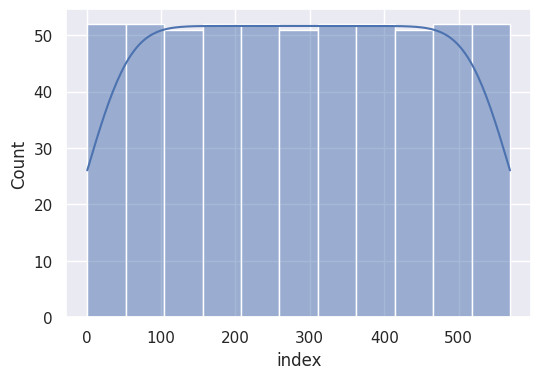

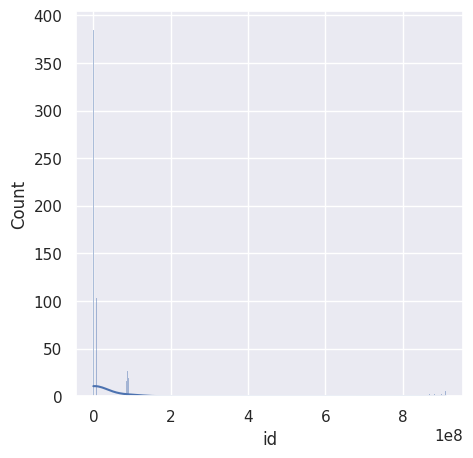

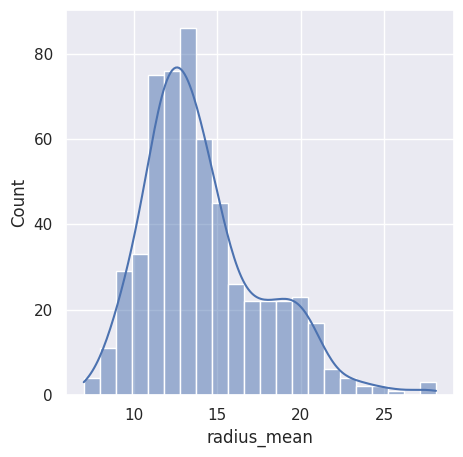

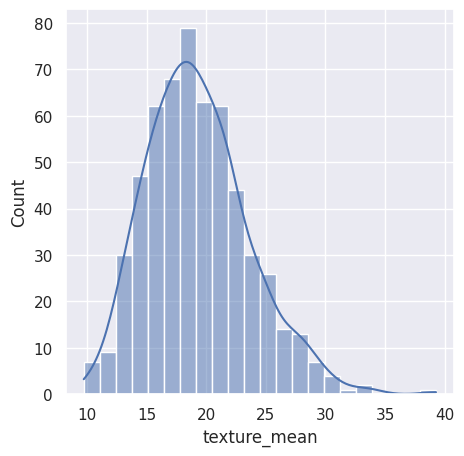

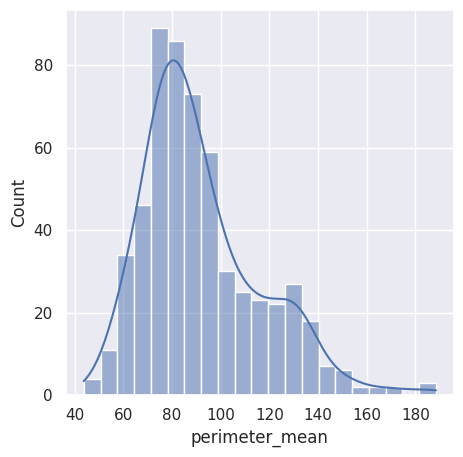

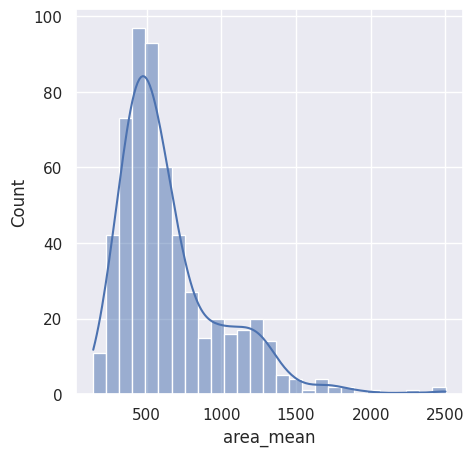

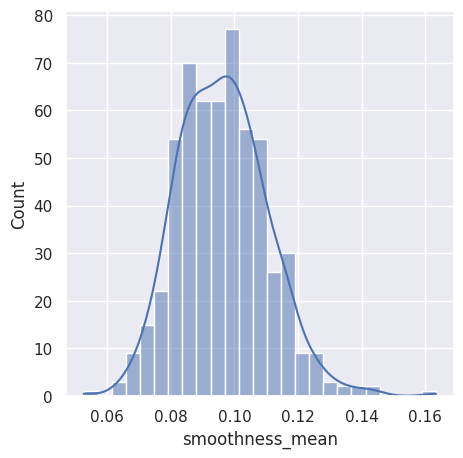

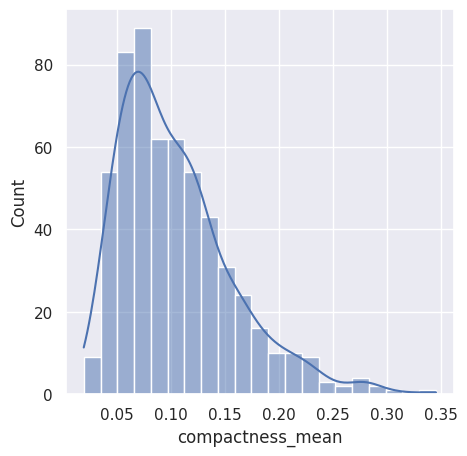

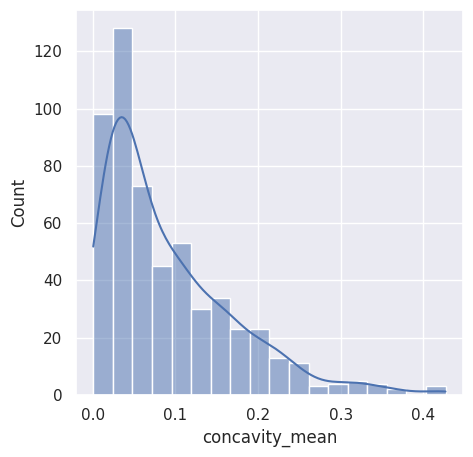

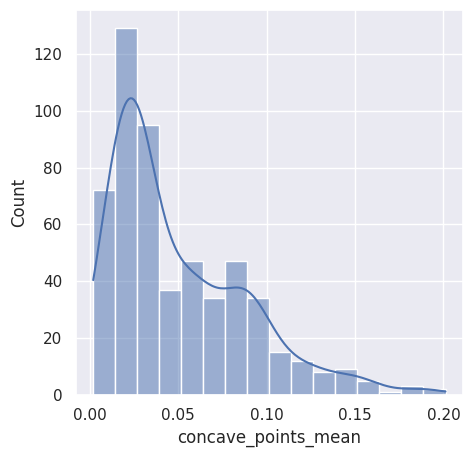

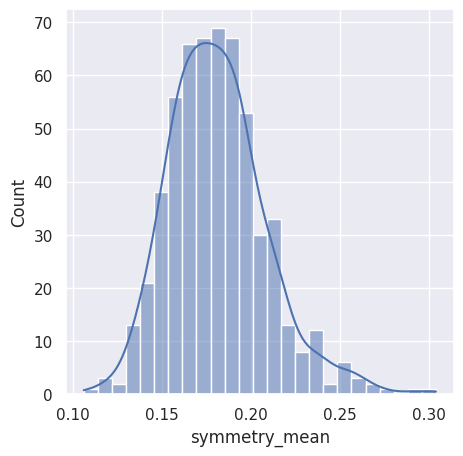

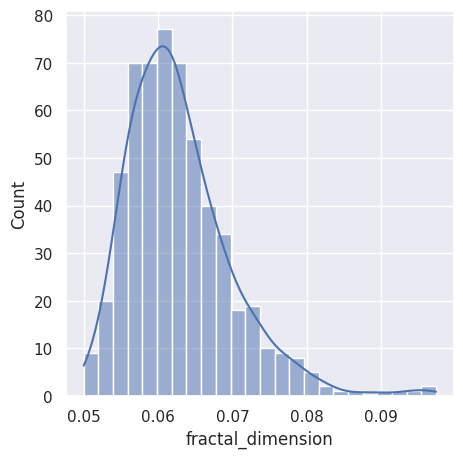

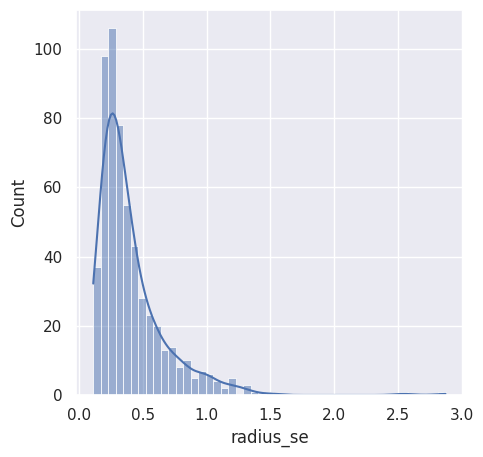

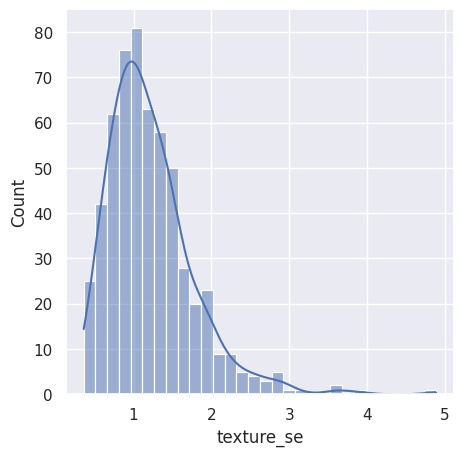

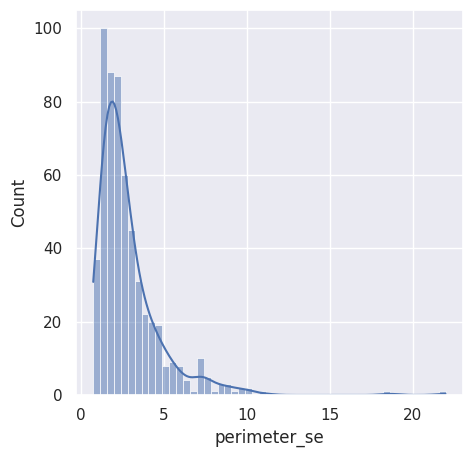

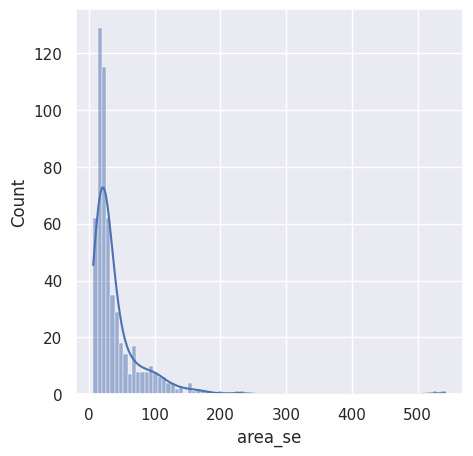

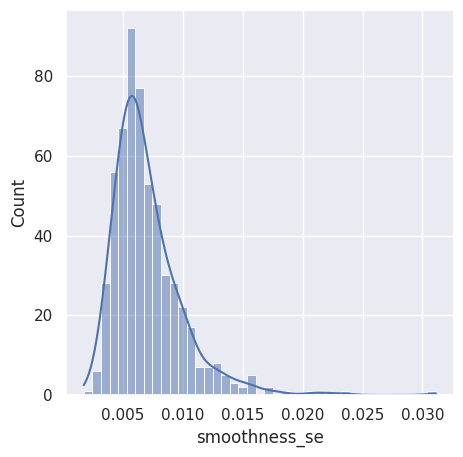

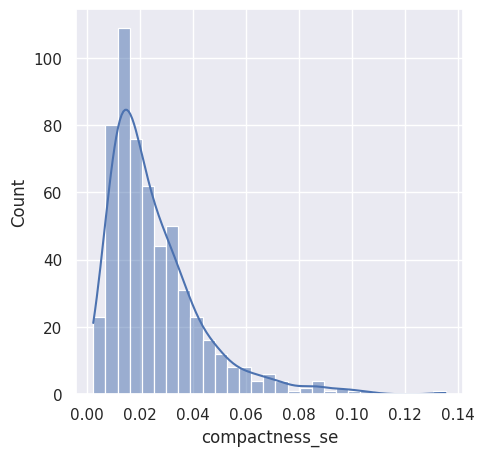

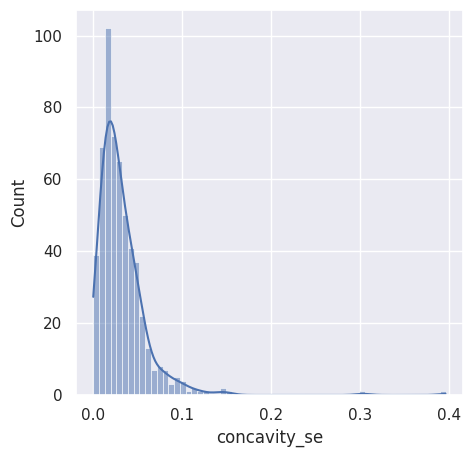

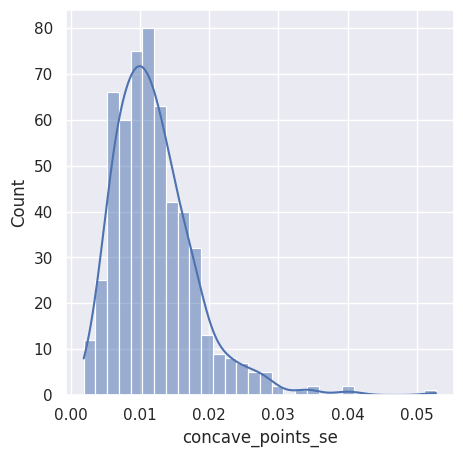

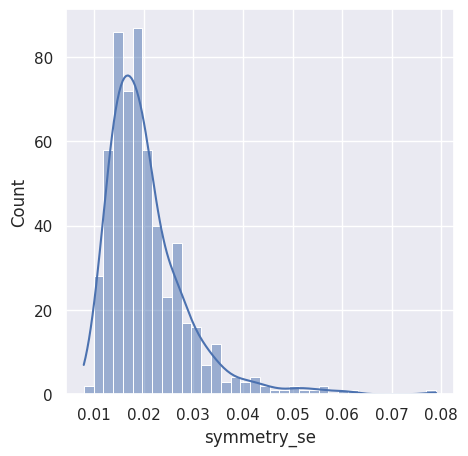

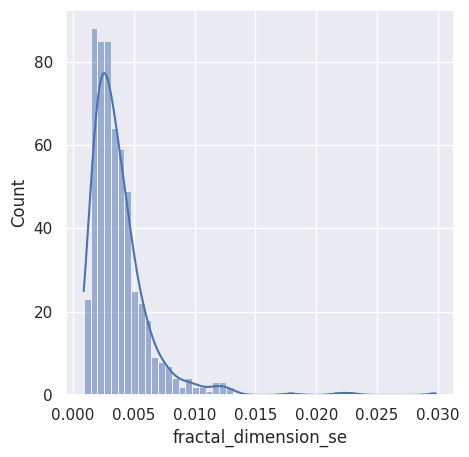

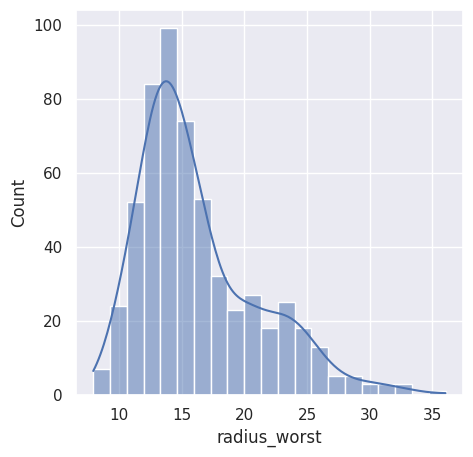

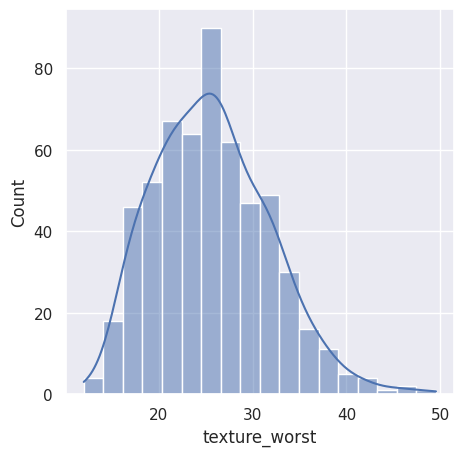

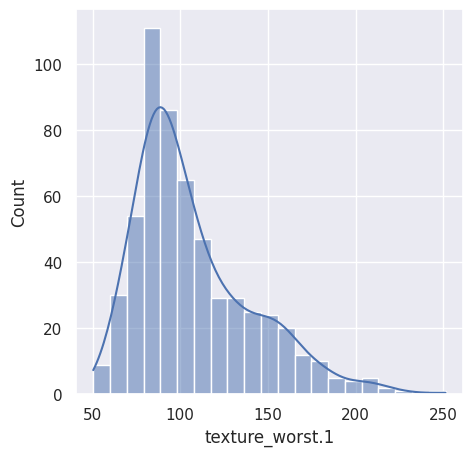

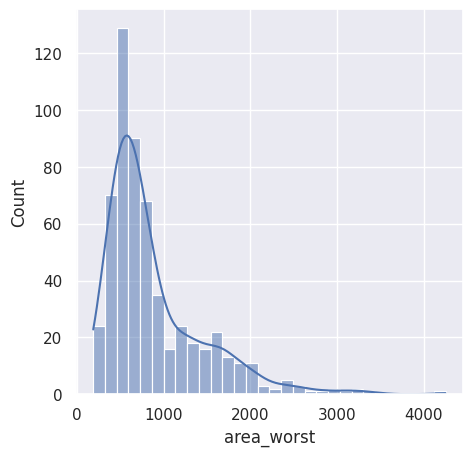

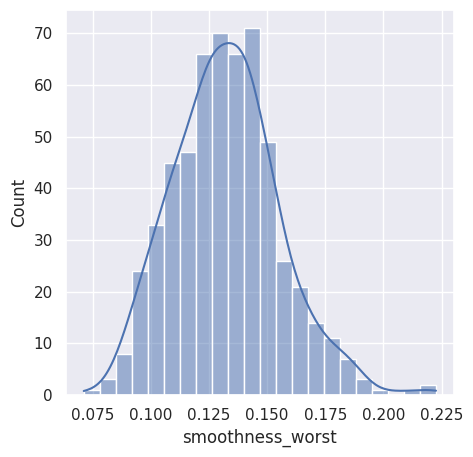

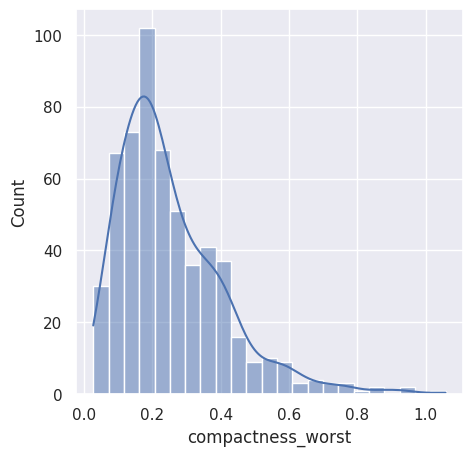

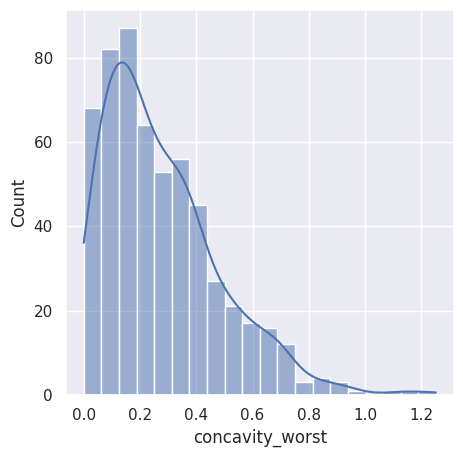

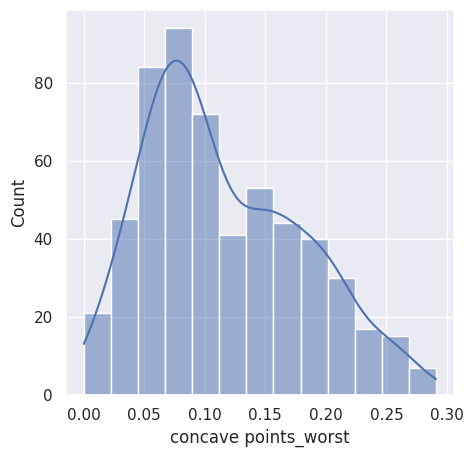

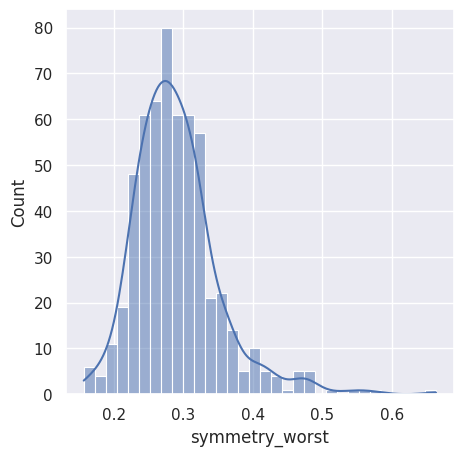

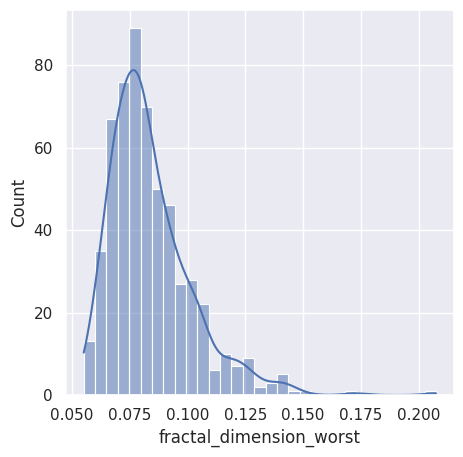

In [97]:
plt.figure(figsize=(6,4))

for col in num_cols:
    sns.set(rc = {'figure.figsize':(5,5)})
    sns.histplot(data=data, x=col, kde=True)
    print("\n")
    plt.show()

In [98]:
import matplotlib
matplotlib.rcParams['figure.figsize']

[5.0, 5.0]

## Drawing Pie-charts for the categorical columns

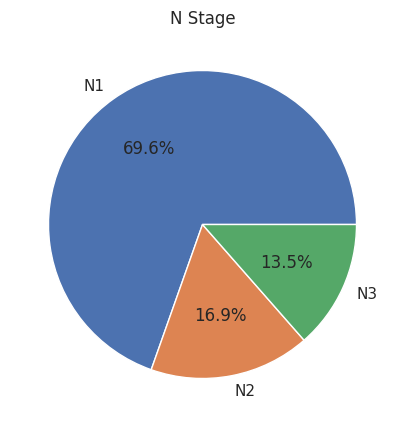

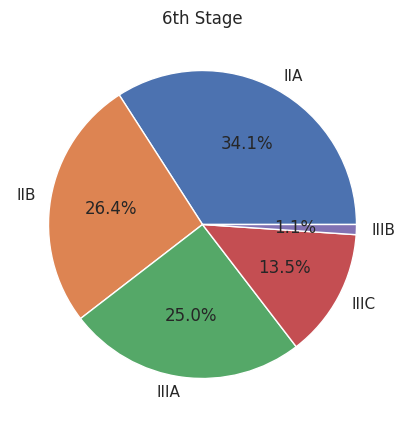

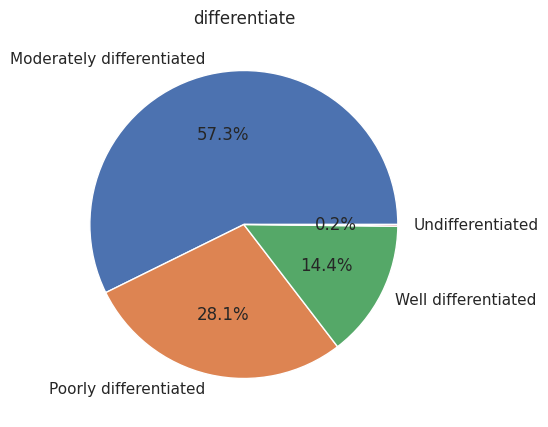

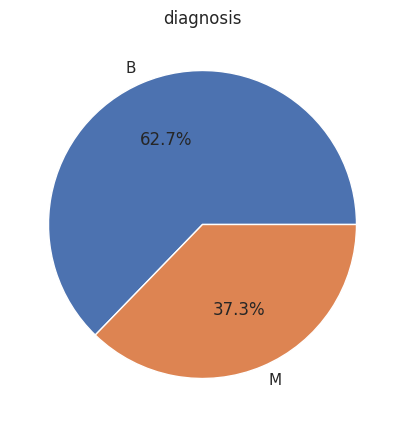

In [99]:

# Pie chart
for cat in cat_cols:
    diamond_cut_counts = data[cat].value_counts()
    plt.pie(diamond_cut_counts, labels=diamond_cut_counts.index, autopct='%1.1f%%')
    plt.title(f"{cat}")
    plt.show()


### Plotting box-plot for outliers

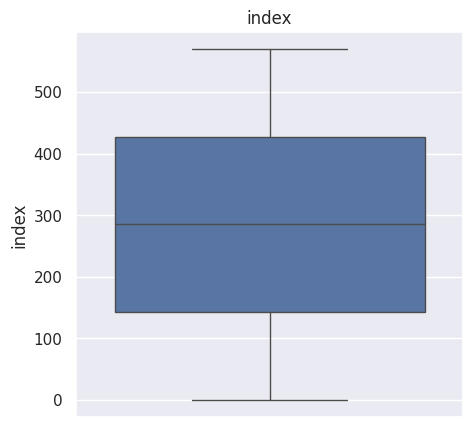

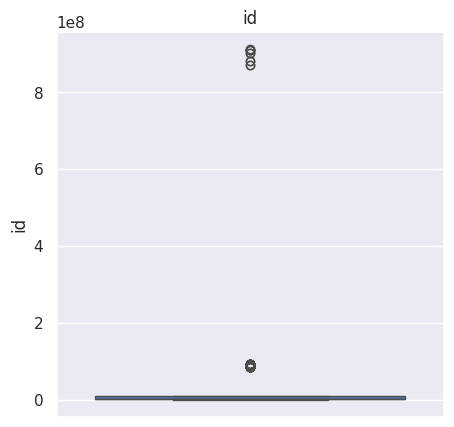

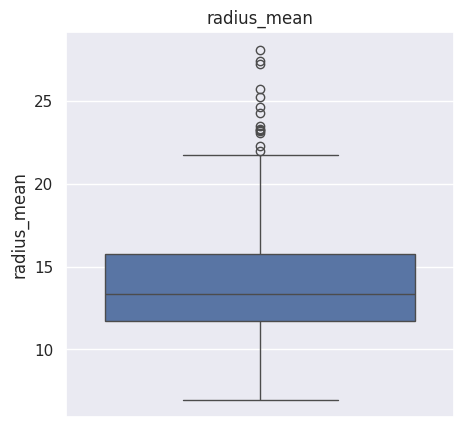

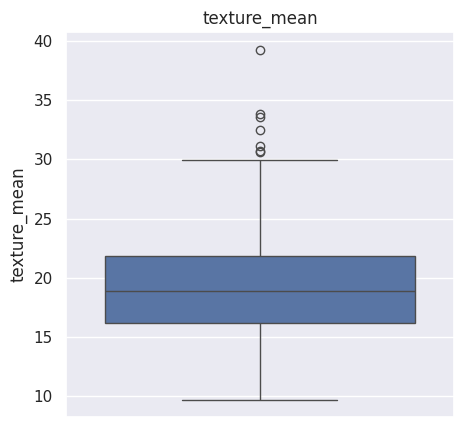

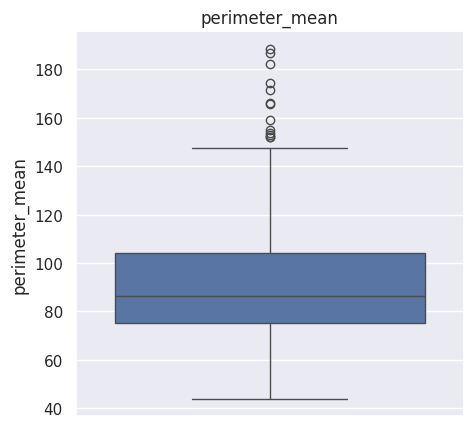

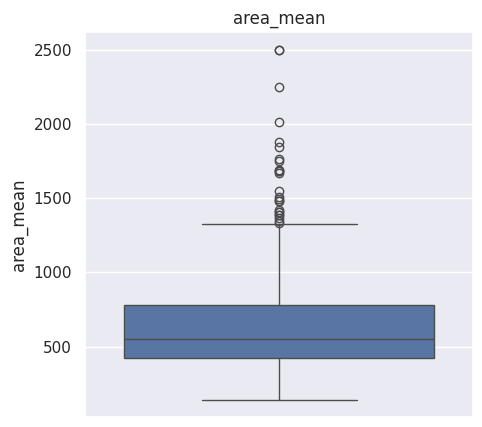

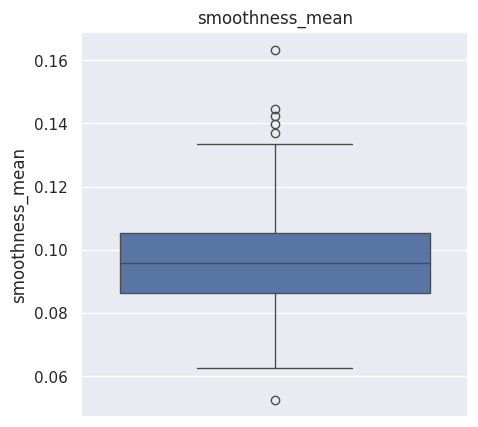

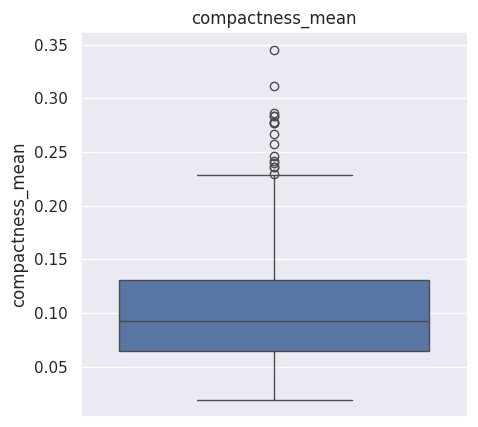

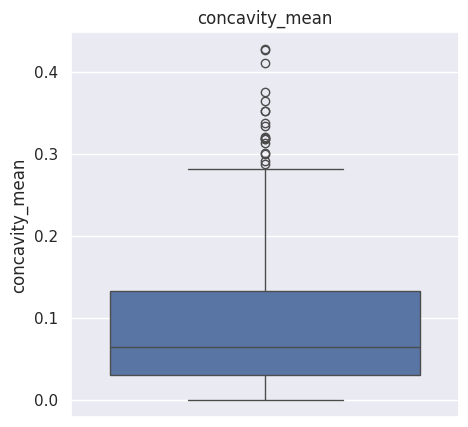

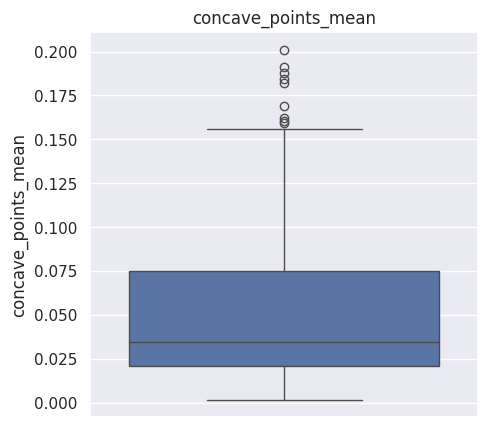

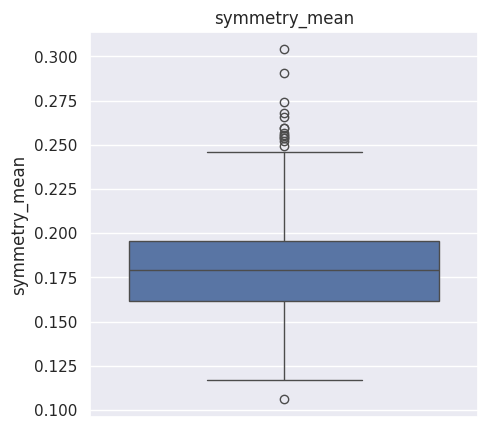

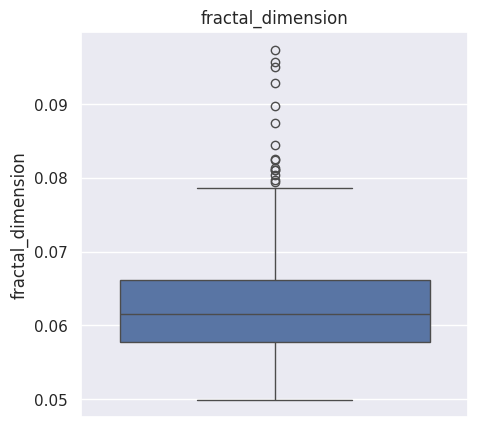

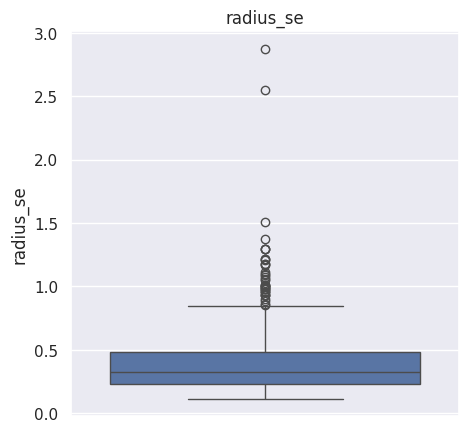

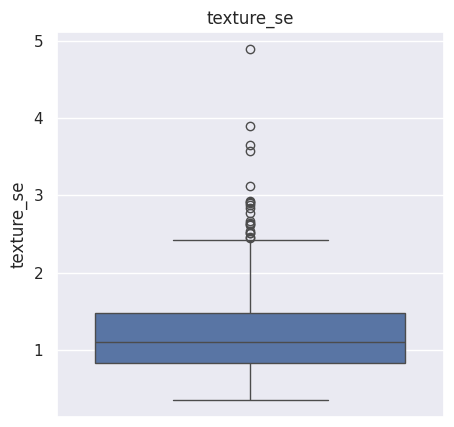

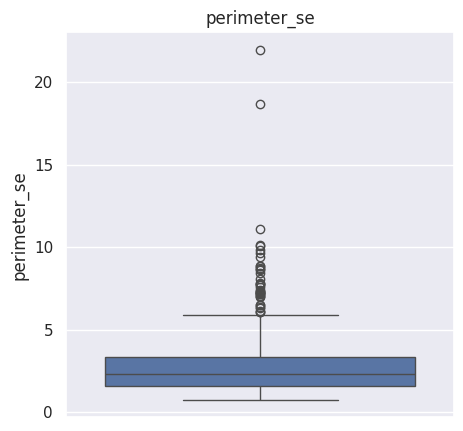

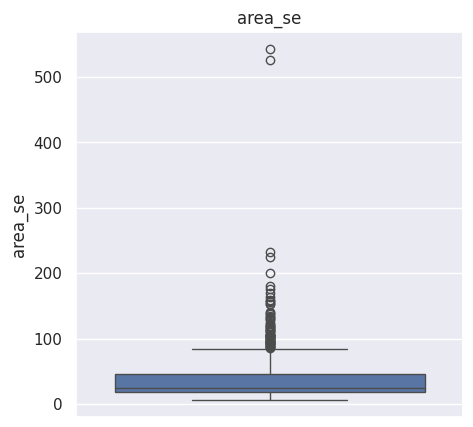

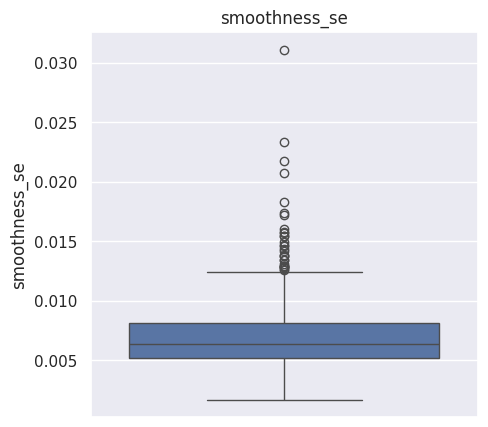

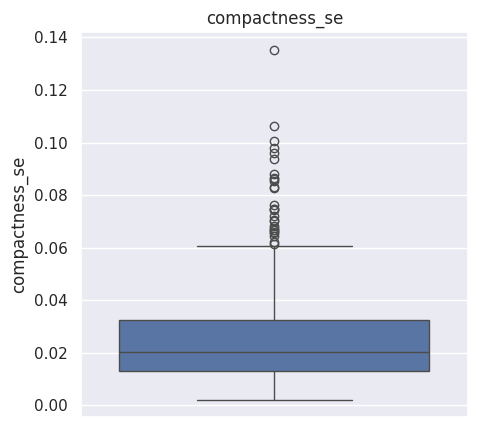

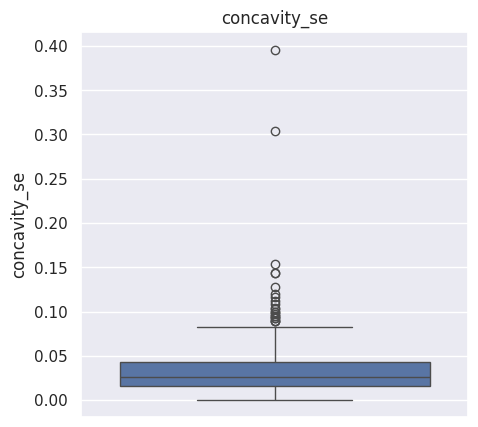

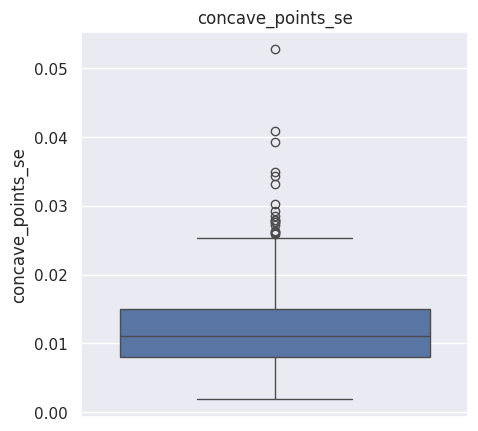

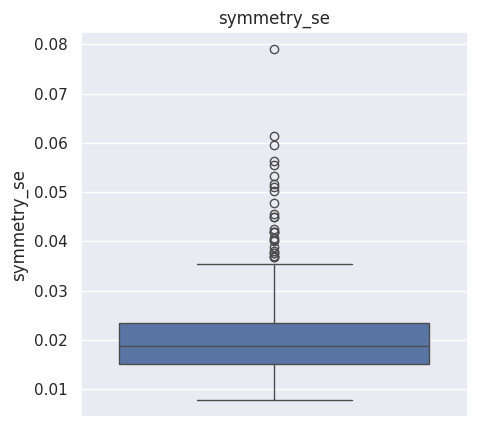

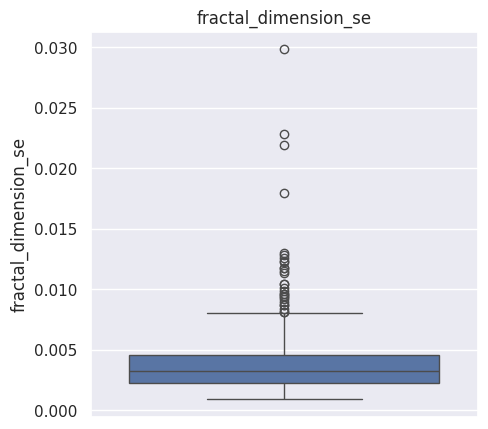

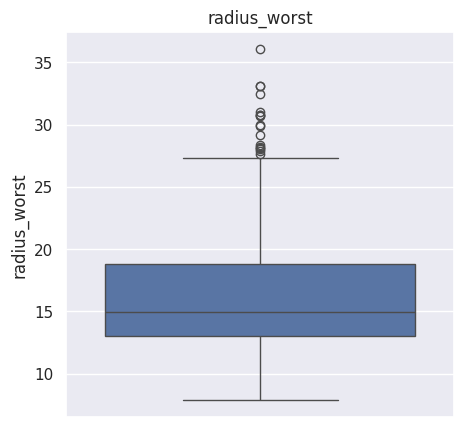

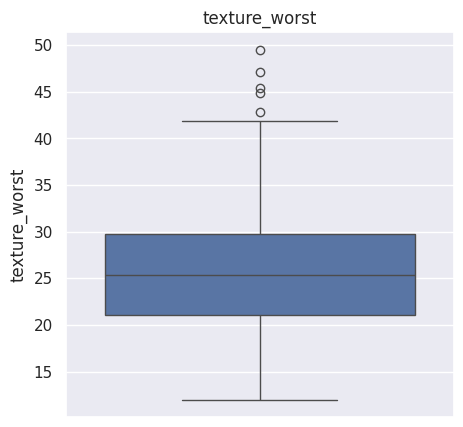

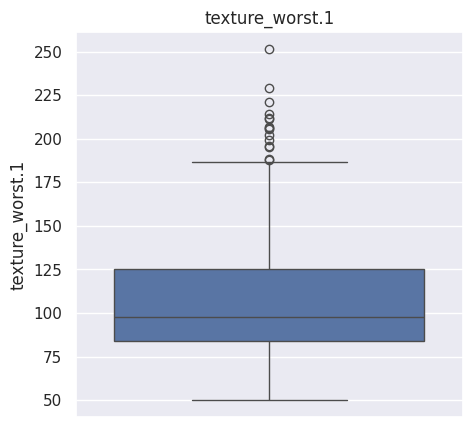

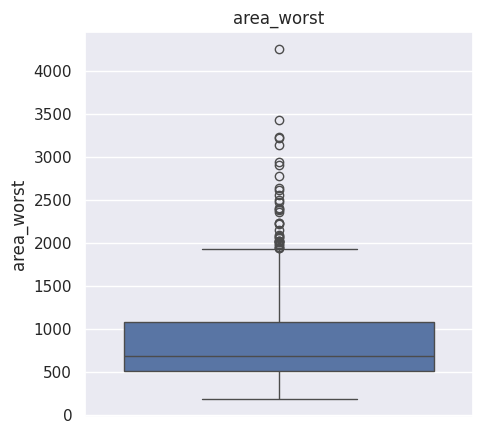

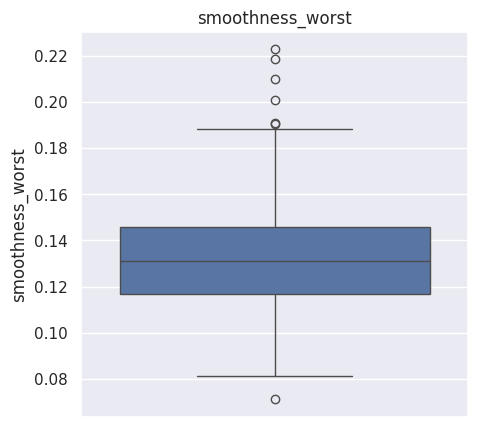

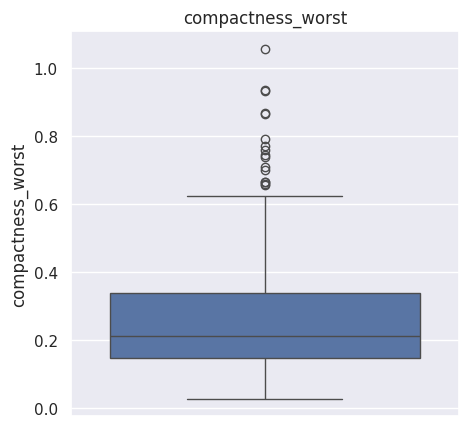

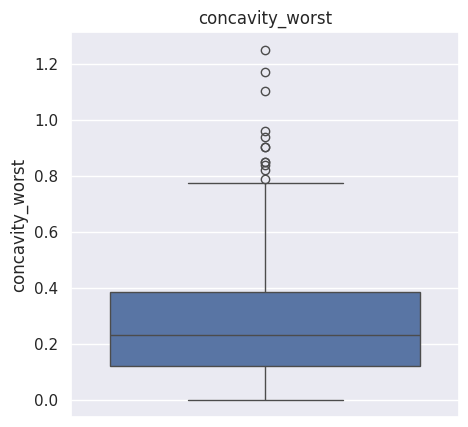

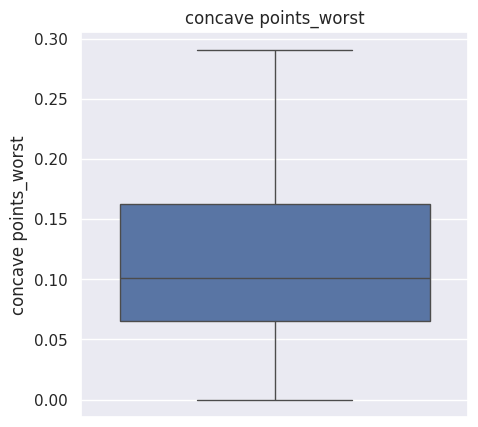

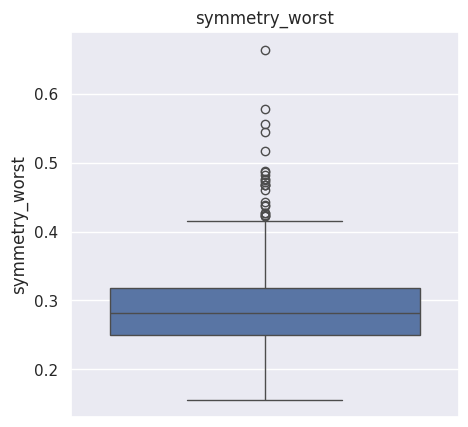

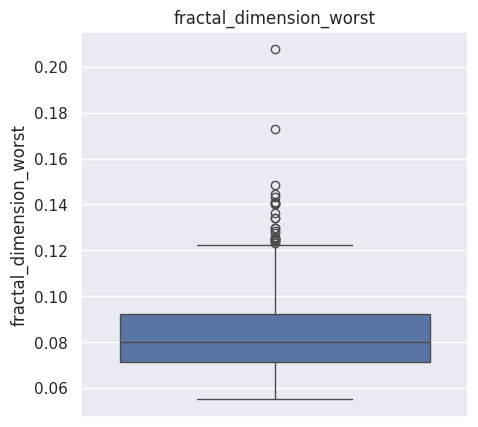

In [100]:
for cat in num_cols:
    sns.boxplot(df[cat])
    plt.title(cat)
    plt.show()  

In [101]:
len(num_cols)

32

In [102]:
for cat in num_cols:
    IQR=df[cat].quantile(0.75)-df[cat].quantile(0.25)
    UB= df[cat].quantile(0.75)+ (1.5*IQR)
    LB= df[cat].quantile(0.25)-(1.5*IQR)
    print(f"{cat} UB: {UB}")
    print(f"{cat} LB: {LB}")
    print()



index UB: 853.0
index LB: -283.0

id UB: 20728995.5
id LB: -11046648.5

radius_mean UB: 21.9
radius_mean LB: 5.579999999999999

texture_mean UB: 30.244999999999997
texture_mean LB: 7.725000000000003

perimeter_mean UB: 147.49499999999998
perimeter_mean LB: 31.775000000000013

area_mean UB: 1326.3000000000002
area_mean LB: -123.30000000000001

smoothness_mean UB: 0.133695
smoothness_mean LB: 0.057975

compactness_mean UB: 0.22861999999999996
compactness_mean LB: -0.03329999999999997

concavity_mean UB: 0.28449250000000004
concavity_mean LB: -0.12128750000000002

concave_points_mean UB: 0.15622874999999997
concave_points_mean LB: -0.06032124999999998

symmetry_mean UB: 0.24640000000000006
symmetry_mean LB: 0.11119999999999995

fractal_dimension UB: 0.07874999999999999
fractal_dimension LB: 0.045070000000000006

radius_se UB: 0.84865
radius_se LB: -0.13735000000000003

texture_se UB: 2.43415
texture_se LB: -0.12625000000000008

perimeter_se UB: 5.9835
perimeter_se LB: -1.0205

area_se UB:

## Number of outliers in each column

In [103]:
for cat in num_cols:
    IQR=df[cat].quantile(0.75)-df[cat].quantile(0.25)
    UB= df[cat].quantile(0.75)+ (1.5*IQR)
    LB= df[cat].quantile(0.25)-(1.5*IQR)
    s=0
    for row in df[cat]:
        if row>=UB or row<= LB:
            s+=1
    print(f"{cat}: {s}")

index: 0
id: 81
radius_mean: 14
texture_mean: 7
perimeter_mean: 13
area_mean: 25
smoothness_mean: 6
compactness_mean: 16
concavity_mean: 18
concave_points_mean: 9
symmetry_mean: 15
fractal_dimension: 15
radius_se: 38
texture_se: 20
perimeter_se: 38
area_se: 65
smoothness_se: 30
compactness_se: 28
concavity_se: 22
concave_points_se: 18
symmetry_se: 27
fractal_dimension_se: 28
radius_worst: 17
texture_worst: 5
texture_worst.1: 15
area_worst: 35
smoothness_worst: 7
compactness_worst: 16
concavity_worst: 12
concave points_worst: 0
symmetry_worst: 23
fractal_dimension_worst: 24


# Steps for Feature Engineering

#####
1: Getting rid of unnecessary columns   
2: Handling the missing values   
3: Encoding the categorical values to numerical values   
4: Handling the Outliers in the data